In [1]:
import numpy as np
import pandas as pd

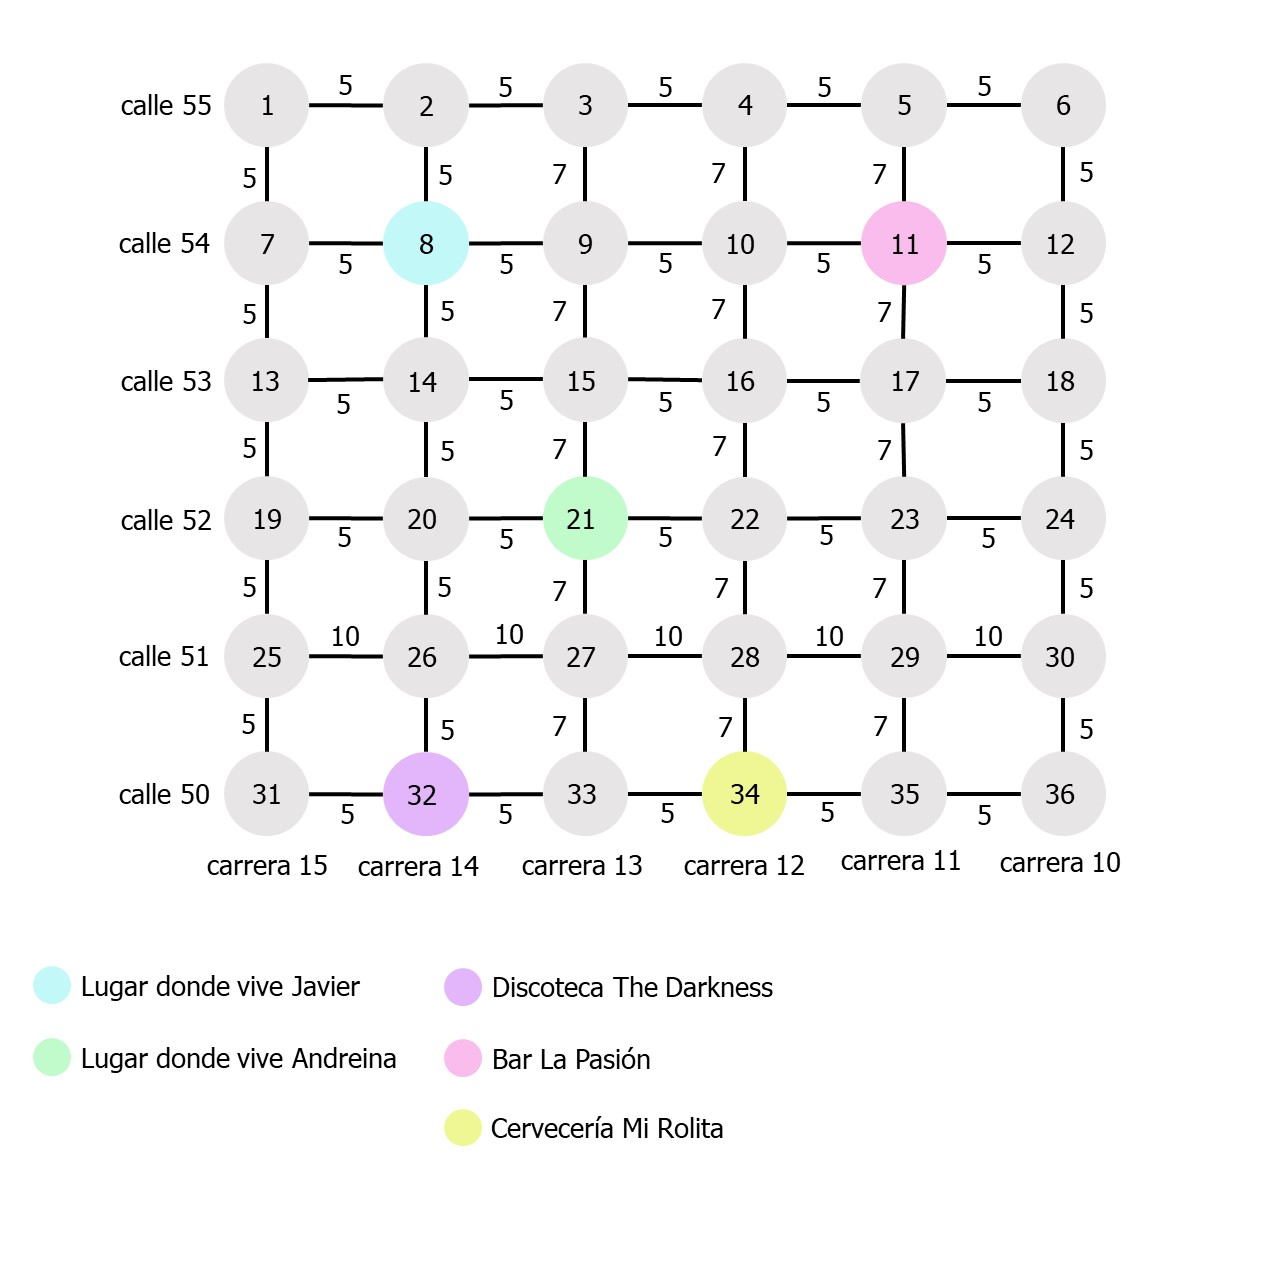




Elaborado por: Diana Decena, Alexander Kalen, Andrés Espinoza, Nicolás Silveira y Reynaldo Ramirez. 

In [2]:
#Leer archivo
data_frame = pd.read_excel("matriz_ady.xlsx")

#Ensamblar la matriz usando el dataframe del archivo
a_m = []

for i in range(36):
  a_m.append(data_frame[i+1].tolist())


#Construir Tabla
def construir_tabla(iter):
  #Leer archivo
  if (iter==0):
    data_frame2 = pd.read_excel("tabla_javier.xlsx")
  elif (iter==1):
    data_frame2 = pd.read_excel("tabla_andreina.xlsx")

  #nodo - visitado - tiempo min desde el origen - predecesor
  tabla = []

  for i in range(36):
    tabla.append(data_frame2[i+1].tolist())

  tabla = np.array(tabla)

  #print(tabla)
  return tabla

#Algoritmo de Dijkstra
def dijkstra(tabla):	
	pila = [1] #inicializar pila en la que se guardarán los nodos que se deben visitar 

	while pila:
		v = pila.pop() #sacar primer elemento de la pila 
		# print('Javier Visita: '+str(v))

		for nodo_ady in range(len(a_m[v-1])):
			if a_m[v-1][nodo_ady] != 0 and tabla[v-1,1] == 0:
				if tabla[v-1,2] + a_m[v-1][nodo_ady] < tabla[nodo_ady,2]:
					tabla[nodo_ady,2] = tabla[v-1,2] + a_m[v-1][nodo_ady]
					tabla[nodo_ady,3] = v
		tabla[v-1,1] = 1
		# print(tabla, '\n--Fin de la tabla de iteracion--')

		no_visitados = np.where(tabla[:,1] == 0)
		if len(no_visitados[0]) > 0: 
			filas_nv = [i for i in no_visitados[0]]
			dist_min = min(tabla[filas_nv,2])
			for i in range(len(tabla)):
				if tabla[i][2] == dist_min and tabla[i][1] == 0:
					nodo = tabla[i][0]
			pila.append(nodo)

def dijkstra_subordinado(tabla, camino_recorrido, nodo_inicio, nodo_destino):
  #Ahora esta pila comienza en el destino, no en uno porque estamos buscando un camino especifico
  pila = [nodo_destino]
  #Declaramos una variable auxiliar que nos ayde a recorrer el camino de javier
  # aux = 0
  recorrido_completo = 0
  nodos_por_recorrer = True

  print('Largo del recorrido de Javier: ', len(camino_recorrido))

  while pila:
    nodo_a_visitar = pila.pop()
    #El range va desde el destino hasta el origen, nuevamente no tenemos que encontrar todas las rutas
    # for nodo_ady in range(nodo_destino, nodo_inicio):
    nodo_ady = nodo_destino
    recorrido_completo = 0

    while recorrido_completo < 1:
      if a_m[nodo_a_visitar - 1][nodo_ady] != 0 and tabla[nodo_a_visitar - 1, 1] == 0:
        if tabla[nodo_a_visitar -1 ,2] + a_m[nodo_a_visitar -1][nodo_ady] < tabla[nodo_ady,2]:
          #Booleano que se torna False si hay un choque entre Javier y Andreina
          include = True
          #Nuevo condicional que verifica que el no hay sido visitado por Javier

          #Contempla el caso que el camino de Javier es tan corto que no entra en el ciclo
          if len(camino_recorrido) == 2:
            if nodo_a_visitar == camino_recorrido[1]:
              # print("Coincidieron en el nodo", camino_recorrido[1], '| Andreina viene de ',tabla[nodo_ady,0], 'y Javier de: ', camino_recorrido[0])
              if tabla[nodo_ady,0] == camino_recorrido[0]:
                include = False
                print('Descartando nodo porque ya fue visitado por Javier')

          #Recorre el camino de Javier, asegurandonos que Andreina no chocara con el
          for aux in range(len(camino_recorrido)-2):
            # print('nodo_a_visitar: ', nodo_a_visitar, ' camino_recorrido', camino_recorrido[aux+1])
            if nodo_a_visitar == camino_recorrido[aux+1]:
              # print('Andreina se encontrara con Javier en ', camino_recorrido[aux+1])
              # print('Andreina va a ', tabla[nodo_ady,0], ' mientras que Javier a ', camino_recorrido[aux])
              # print('Nuevo nodo anadido: ', tabla[nodo_ady,0], ' | Viniendo de: ', tabla[nodo_ady,3])
              if tabla[nodo_ady, 0] == camino_recorrido[aux]:
                include = False
                print('Descartando nodo porque ya fue visitado por Javier')

          if include:
            tabla[nodo_ady,2] = tabla[nodo_a_visitar -1, 2] + a_m[nodo_a_visitar - 1][nodo_ady]
            tabla[nodo_ady, 3] = nodo_a_visitar

          

      if nodo_ady == len(a_m[0])-1:
        nodo_ady = 0
      else:
        nodo_ady = nodo_ady + 1
      if nodo_ady == nodo_destino:
        recorrido_completo = recorrido_completo + 1

    tabla[nodo_a_visitar - 1,1] = 1

    #Como ya esta agregando el nodo como visitado, sabemos que no va a recorrerlo otra vez, entonces ya brincamos al siguiente nodo del recorrido de Javier
    # if tabla[nodo_a_visitar - 1,0] == camino_recorrido[aux+1] and aux >= 0 and aux < len(camino_recorrido)-2:
    #   print('Valor de aux:', aux)
    #   aux = aux + 1

    no_visitados = np.where(tabla[:,1] == 0) #se buscan las filas en la tabla de los nodos que no han sido visitados 
    if len(no_visitados[0]) > 0: 
      filas_nv = [i for i in no_visitados[0]] #se guardan las filas
      # print('tiempo minimo: ',min(tabla[filas_nv,2]), '| Visitada: ', tabla[filas_nv,3]) 
      dist_min = min(tabla[filas_nv,2]) #se busca el tiempo mínimo entre las filas obtenidas anteriormente
      iterador_ciclo = nodo_destino
      nodos_por_recorrer = True
      # for i in range(len(tabla)): #se recorre la tabla
      while nodos_por_recorrer:
        if tabla[iterador_ciclo][2] == dist_min and tabla[iterador_ciclo][1] == 0: #si el tiempo en esa pos es el tiempo min y el nodo no ha sido visitado 
          nodo = tabla[iterador_ciclo][0] #se guarda el nodo
          # print('Andreina encontro un nodo: ', nodo)
          pila.append(nodo) #se agrega ese nodo a la pila y será el próxima a visitar
          
        if iterador_ciclo == len(a_m[0]) - 1:
          iterador_ciclo = 0
        else:
          iterador_ciclo = iterador_ciclo + 1

        if iterador_ciclo == nodo_destino:
          nodos_por_recorrer = False
  # print(tabla)


#Buscar el camino
def buscar_el_camino(a, b):
	
  class Persona:
    def __init__(self, camino, tiempo):
      self.camino = camino
      self.tiempo = tiempo

  start, end, camino, seguir, guardar = a, b, [], True, True                  #aquí se define el nodo inicio y nodo final para armar el camino

  while seguir:
    fila_end = np.where(tabla[:,0] == end) #se busca la fila en del nodo destino 
    camino.append(end) #se agrega el destino al array camino 
    if guardar:
      tiempo = tabla[fila_end[0][0],2] #se guarda el tiempo en esa pos porque es el destino y tiene el tiempo acumulado (se usa [0][0] porque np.where te trae una tupla y en [0] un array)
    guardar = False
    end = tabla[fila_end[0][0],3] #ahora el final será el predecesor del nodo 
    if tabla[fila_end,0] == start or fila_end == []: #si el nodo actual es el origen o la fila del nodo destino está vacía 
      seguir = False #se termina el bucle 

  nueva_persona = Persona(camino, tiempo)

  return nueva_persona
  
  
  # nueva_persona = Persona(camino, tiempo)
  # return nueva_persona
  


#Mostrar el resultado
def plan_de_viaje(tiempo_javier, recorrido_javier, tiempo_andreina, recorrido_andreina):
  
  #Imprime en pantalla quien debe salir primero
  if tiempo_javier > tiempo_andreina:
    diferencia_tiempo = tiempo_javier - tiempo_andreina
    print('Javier debe salir ', diferencia_tiempo, ' minutos antes que Andreina')
  elif tiempo_javier == tiempo_andreina:
    print('Javier y Andreina deben salir en el mismo momento')
  else:
    diferencia_tiempo = tiempo_andreina - tiempo_javier
    print('Andreina debe salir ', diferencia_tiempo, ' minutos antes que Javier')
  max_recorrido = max(tiempo_javier, tiempo_andreina)
  print('El tiempo de caminata de la pareja fue de '+str(max_recorrido)+' minutos')

  #Verifica que no hay caminos compartidos
  if len(recorrido_javier) < len(recorrido_andreina):
    recorrido_menor = len(recorrido_javier)
  else:
    recorrido_menor = len(recorrido_andreina)
  
  # for i in range(recorrido_menor - 2):
  #   if recorrido_javier[i] == recorrido_andreina[i]:
  #     if recorrido_javier[i+1] == recorrido_andreina[i+1]
  #       print('Los caminos se cruzan!')


#Ubicaciones
casa_javier = 8
casa_andreina = 21
discoteca = 32
bar = 11
cerveceria = 34
nuevo_sitio = 32

#RECORRIDO JAVIER
tabla = construir_tabla(0)
dijkstra(tabla)
javier = buscar_el_camino(casa_javier, bar)
print('Javier tardo ', javier.tiempo, ' minutos en el camino de tiempo mínimo: '+str(javier.camino[::-1]))

#RECORRIDO ANDREINA
tabla = construir_tabla(1)
dijkstra_subordinado(tabla, javier.camino, casa_andreina, bar)
andreina = buscar_el_camino(casa_andreina, bar)                                          #Pasar el punto de inicio y el de llegada
print('Andreina tardo ', andreina.tiempo, ' minutos en el camino de tiempo mínimo: '+str(andreina.camino[::-1]))

#Conclusiones sobre el viaje
plan_de_viaje(javier.tiempo,javier.camino,andreina.tiempo,andreina.camino) 

Javier tardo  15  minutos en el camino de tiempo mínimo: [8, 9, 10, 11]
Largo del recorrido de Javier:  4
Andreina tardo  24  minutos en el camino de tiempo mínimo: [21, 22, 23, 17, 11]
Andreina debe salir  9  minutos antes que Javier
El tiempo de caminata de la pareja fue de 24 minutos
